In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from scipy import stats, integrate
from Bio import SeqIO
from PIL import Image

In [9]:
# 设置绘图风格
# sns.set_style("ticks", rc={"xtick.direction": "in", "ytick.direction": "in", "ytick.major.pad": 1})
# 处理中文乱码
plt.rcParams['font.sans-serif'] = ['Arial']
# 坐标轴负号的处理
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'text.usetex': False})


In [10]:
# 使用pandas读取csv文件
result_2_luc = pd.read_csv('UTR_data/Luc_evaluation_data.csv', encoding='GBK')
print("utr number is: ", len(result_2_luc))
result_2_luc.head()

utr number is:  24


,name,id,tag,group,data_1,data_2,average,standard_deviation,relative_average,standard_deviation_divided_by_average
0,hHBA,mRNA_4,293T,Positive control,2981871,3289151,3135511.0,153640.0,1.000000,0.049000
1,UTR_16,mRNA_16,293T,In silico,6345909,6906242,6626075.5,280166.5,2.113236,0.042282
2,UTR_17,mRNA_17,293T,In silico,7985262,7284690,7634976.0,350286.0,2.435002,0.045879
3,UTR_20,mRNA_20,293T,In silico,7195219,6841660,7018439.5,176779.5,2.238372,0.025188
4,UTR_22,mRNA_22,293T,In silico,6695166,6363304,6529235.0,165931.0,2.082351,0.025414


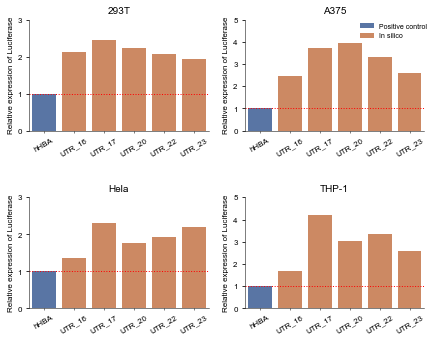

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 设置字体为 Times New Roman，并设置字体大小为 8 磅（points）
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 8

# 按 'tag' 列的不同值进行分组
tags = result_2_luc['tag'].unique()

# 设置图形大小
# 调整图的大小，单位为英寸，下面提供三种不同版式的尺寸设置
# 选择单栏图
# fig_width = 8.5 / 2.54  # 单栏图 8.5 cm = 3.35 英寸
# 选择 1.5 栏图
# fig_width = 12.0 / 2.54  # 1.5 栏图 12 cm = 4.72 英寸
# 选择双栏图
fig_width = 18.0 / 2.54  # 双栏图 18 cm = 7.09 英寸

# 设置图的高度，SCI投稿官网没有具体要求，这里设定为合适的比例
fig_height = fig_width * 0.75  # 高度为宽度的0.75倍

# 创建一个 2x2 的子图布局
fig, axes = plt.subplots(2, 2, figsize=(fig_width, fig_height), gridspec_kw={'hspace': 0.6})

# 迭代所有的标签，并在各自的子图上绘制图形
for i, tag in enumerate(tags):
    # 筛选当前 'tag' 的数据
    data_tag = result_2_luc[result_2_luc['tag'] == tag]
    
    # 计算当前子图位置
    ax = axes[i // 2, i % 2]
    
    # 创建带有误差棒的柱状图
    sns.barplot(ax=ax, x='name', y='relative_average', data=data_tag, hue='group', dodge=False, palette='deep', linewidth=0.0, order=data_tag['name'])
    
    # 添加误差棒
    # ax.errorbar(x=range(len(data_tag)), y=data_tag['relative_average'], yerr=data_tag['standard_deviation_divided_by_average'], fmt='none', c='black', capsize=2.5, elinewidth=0.5)
    
    # 设置x轴和y轴标签
    ax.set_xlabel('', fontsize=8)
    ax.set_ylabel('Relative expression of Luciferase', fontsize=8)
    
    # 设置轴的线宽
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    
    # 隐藏右边和上面的脊柱
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 设置x轴和y轴标签的字体大小
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=8, rotation=30, ha='center')
    
    # 设置y轴刻度间隔（动态设置）
    ax.set_yticks(range(0, int(data_tag['relative_average'].max() + data_tag['standard_deviation_divided_by_average'].max()) + 2, 1))
    ax.tick_params(axis='y', labelsize=8)
    
    # 显示刻度线
    ax.tick_params(axis='x', direction='out', length=2, width=0.5, labelsize=8)
    
    # 添加水平辅助线
    hHBA_mean = data_tag[data_tag['name'] == 'hHBA']['relative_average'].mean()
    ax.axhline(y=hHBA_mean, color='red', linestyle=':', linewidth=1)
    
    # 添加标题
    ax.set_title(f'{tag}', fontsize=10)
    
    # 移除子图的图例
    ax.get_legend().remove()

# 创建共享的图例
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=7, frameon=False, bbox_to_anchor=(0.85, 0.85))

# # 保存图像为高质量PDF文件
# fig.savefig('result_4/barplot_luc_combined.pdf', dpi=300, bbox_inches='tight')

# # 保存图像为高质量SVG文件
# fig.savefig('result_4/barplot_luc_combined.svg', bbox_inches='tight')

# Save the plot as a high-quality PNG image first
# plt.savefig('result_4/barplot_luc_combined.png', dpi=600, bbox_inches='tight')

# Then, use Pillow to convert the PNG image to TIFF format
# png_image = Image.open('result_4/barplot_luc_combined.png')
# png_image.save('result_4/barplot_luc_combined.tiff', dpi=(600, 600), compression='tiff_lzw')

# 自动优化布局，防止重叠
# plt.tight_layout()

# 保存为 SVG 格式
plt.savefig('result_4/barplot_luc_combined.svg', format='svg', bbox_inches='tight')

# 显示图像
plt.show()


In [14]:
# 使用pandas读取csv文件
result_2_il7 = pd.read_csv('UTR_data/IL7_evaluation_data.csv', encoding='utf-8')
print("utr number is: ", len(result_2_il7))
result_2_il7.head()

utr number is:  24


,name,id,tag,group,unit,dilution_factor,concentration_1,concentration_2,concentration_3,concentration_4,average_concentration,concentration_standard_deviation,relative_average_concentration,standard_deviation_divided_by_average
0,hHBA,mRNA_4,293T,Positive control,(ng/ml),1000,206.40,178.77,234.00,214.69,208.4650,19.854748,1.000000,0.095243
1,UTR_16,mRNA_16,293T,In silico,(ng/ml),1000,172.97,145.45,178.42,167.89,166.1825,12.535736,0.797172,0.075434
2,UTR_17,mRNA_17,293T,In silico,(ng/ml),1000,339.26,285.14,361.26,316.40,325.5150,28.195097,1.561485,0.086617
3,UTR_20,mRNA_20,293T,In silico,(ng/ml),1000,191.32,176.95,188.92,166.85,181.0100,9.821576,0.868299,0.054260
4,UTR_22,mRNA_22,293T,In silico,(ng/ml),1000,105.54,105.68,109.42,114.55,108.7975,3.667727,0.521898,0.033711


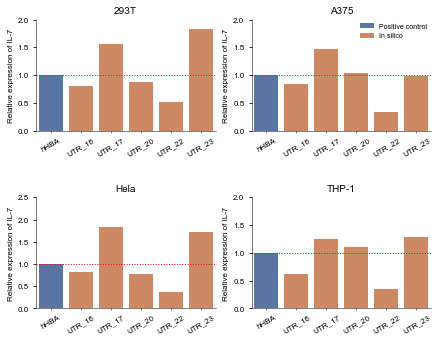

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 设置字体为 Times New Roman，并设置字体大小为 8 磅（points）
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 8

# 按 'tag' 列的不同值进行分组
tags = result_2_luc['tag'].unique()

# 设置图形大小
# 调整图的大小，单位为英寸，下面提供三种不同版式的尺寸设置
# 选择单栏图
# fig_width = 8.5 / 2.54  # 单栏图 8.5 cm = 3.35 英寸
# 选择 1.5 栏图
# fig_width = 12.0 / 2.54  # 1.5 栏图 12 cm = 4.72 英寸
# 选择双栏图
fig_width = 18.0 / 2.54  # 双栏图 18 cm = 7.09 英寸

# 设置图的高度，SCI投稿官网没有具体要求，这里设定为合适的比例
fig_height = fig_width * 0.75  # 高度为宽度的0.75倍

# 创建一个 2x2 的子图布局
fig, axes = plt.subplots(2, 2, figsize=(fig_width, fig_height), gridspec_kw={'hspace': 0.6})

# 迭代所有的标签，并在各自的子图上绘制图形
for i, tag in enumerate(tags):
    # 筛选当前 'tag' 的数据
    data_tag = result_2_il7[result_2_luc['tag'] == tag]
    
    # 计算当前子图位置
    ax = axes[i // 2, i % 2]
    
    # 创建带有误差棒的柱状图
    sns.barplot(ax=ax, x='name', y='relative_average_concentration', data=data_tag, hue='group', dodge=False, palette='deep', linewidth=0.0, order=data_tag['name'])
    
    # 添加误差棒
    # ax.errorbar(x=range(len(data_tag)), y=data_tag['average_relative_concentration'], yerr=data_tag['relative_concentration_standard_deviation'], fmt='none', c='black', capsize=2.5, elinewidth=0.5)
    
    # 设置x轴和y轴标签
    ax.set_xlabel('', fontsize=16)
    ax.set_ylabel('Relative expression of IL-7', fontsize=8)
    
    # 设置轴的线宽
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    
    # 隐藏右边和上面的脊柱
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 设置x轴和y轴标签的字体大小
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=8, rotation=30, ha='center')
    
    # 设置y轴刻度间隔（动态设置）
    ax.set_yticks(np.arange(0, data_tag['relative_average_concentration'].max() + data_tag['standard_deviation_divided_by_average'].max() + 0.5, 0.5))
    ax.tick_params(axis='y', labelsize=8)
    
    # 显示刻度线
    ax.tick_params(axis='x', direction='out', length=2, width=0.5, labelsize=8)
    
    # 添加水平辅助线
    hHBA_mean = data_tag[data_tag['name'] == 'hHBA']['relative_average_concentration'].mean()
    ax.axhline(y=hHBA_mean, color='red', linestyle=':', linewidth=1)
    
    # 添加标题
    ax.set_title(f'{tag}', fontsize=10)
    
    # 移除子图的图例
    ax.get_legend().remove()

# 创建共享的图例
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=7, frameon=False, bbox_to_anchor=(0.85, 0.85))

# # 保存图像为高质量PDF文件
# fig.savefig('result_4/barplot_il7_combined.pdf', dpi=300, bbox_inches='tight')

# # 保存图像为高质量SVG文件
# fig.savefig('result_4/barplot_il7_combined.svg', bbox_inches='tight')

# Save the plot as a high-quality PNG image first
# plt.savefig('result_4/barplot_il7_combined.png', dpi=600, bbox_inches='tight')

# Then, use Pillow to convert the PNG image to TIFF format
# png_image = Image.open('result_4/barplot_il7_combined.png')
# png_image.save('result_4/barplot_il7_combined.tiff', dpi=(600, 600), compression='tiff_lzw')

# 保存为 SVG 格式
plt.savefig('result_4/barplot_il7_combined.svg', format='svg', bbox_inches='tight')

# 显示图像
plt.show()
